In [1]:
#! /usr/bin/env python
import numpy as np
import scipy.linalg as LA
import scipy.optimize as SO
import random
import math
import itertools
import statistics
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
import tqdm 
#print("MAKE SURE YOU CHANGE THE FILE NAME")
#input("Press enter to continue")

def show(nlist,glist,name=' ',title=' '):
    if not name and save:
        print("Give a name to save the file")
        exit()
        
    
    plotlist = np.array([[[find_gap(n,g),n] for n in nlist] for g in glist])   
        
    # the histogram of the data
    #plt.hist(eigs, 15, facecolor='green',normed=1, alpha=0.75,histtype='step',label ='Energy')
    markers = ["." ,"o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d"]
    fig,ax = plt.subplots()
    leg = []
    if np.array(plotlist).ndim != 2:
        for k in plotlist:
            leg.append(plt.scatter(k.T[1],np.log(k.T[0]),marker=random.choice(markers)))
            #plt.legend(handles=[plot1],loc=1)
    else:
        leg.append(plt.scatter(plotlist.T[1],np.log(plotlist.T[0]),marker=random.choice(markers)))

    
    ax.grid(True)
    ax.legend(leg,glist)
    plt.title(r'$Mass Gap '+str(title)+'$')
    #plt.yscale('log')
    plt.xlabel(r'$N$')
    plt.ylabel(r'$\log(\Delta E)$')
    plt.savefig("Massgap_acci.png")
    plt.show()


def gap_vs_g(N,g):
    plotdata = np.array([[find_gap(N,gg,find_gap(N,0)),gg] for gg in g])
    #plotdata2 = np.array([[find_gap2(N,gg),gg] for gg in g])

    #print(plotdata)
    plt.scatter(plotdata.T[1],plotdata.T[0],marker="o")
    #plt.scatter(plotdata2.T[1],plotdata2.T[0],marker=".")
    plt.grid(True)
    plt.title(r'$Mass Gap for N =$'+str(N))
    #plt.yscale('log')
    plt.xlabel(r'$g$')
    plt.ylabel(r'$\Delta E$')
    plt.savefig("Massgap"+str(N)+"vs_g.png")
    plt.show()

      
def gap_vs_J(N,J):
    def gapJ(N,jj):
        eigs = np.load('./ham_data_J/'+str(N)+'/syk_eigs_'+str(N)+'_J'+str(jj)+'.npy')
        if (N%8) == 0:
            return abs(eigs[1]-eigs[0])
        else:
            return abs(eigs[2]-eigs[1])
        
        
    plotdata = np.array([[gapJ(N,jj),jj] for jj in J])
    #plotdata2 = np.array([[find_gap2(N,gg),gg] for gg in g])

    #print(plotdata)
    plt.scatter(plotdata.T[1],plotdata.T[0],marker="o")
    #plt.scatter(plotdata2.T[1],plotdata2.T[0],marker=".")
    plt.grid(True)
    plt.title(r'$Mass Gap for N =$'+str(N))
    #plt.yscale('log')
    plt.xlabel(r'$J$')
    plt.ylabel(r'$\Delta E$')
    plt.savefig("Massgap"+str(N)+"vs_J_small.png")
    plt.show()
        
    
    
    
    
    
    
def load_eigs(N,g):
    if g==0:
        H = np.load('./ham_data/'+str(N)+'/syk_eigs_'+str(N)+'_g0.0.npy')
        return H
    H = np.load('./ham_data/'+str(N)+'/syk_eigs_'+str(N)+'_g'+str(g)+'.npy')
    return H

def load_bs(N,g):
    if g == 0:
        bs = np.load('./ham_data/'+str(N)+'/bs_'+str(N)+'_free.npy')
        return H
    bs = np.load('./ham_data/'+str(N)+'/bs_'+str(N)+'_g'+str(g)+'.npy')
    return bs

def find_gap(N,g,free=None):
    eigs = load_eigs(N,g)
    norm = 1
    if not free:
        free = 0
    return abs(abs(eigs[1]-eigs[0]) - free)/abs(norm)
    if (N%8) == 0:
        print("This",g)
        return abs(abs(eigs[1]-eigs[0]) - free)/abs(norm)
    else:
        return abs(abs(eigs[2]-eigs[1]) - free)/abs(norm)
    
def find_gap2(N,g,free=None):
    eigs = load_eigs(N,g)
    norm =1
    if not free:
        free = 0
    if (N%8) == 0 or g != 0:
        return abs(abs(eigs[2]-eigs[1]) - free)/abs(norm)
    else:
        return abs(abs(eigs[3]-eigs[4]) - free)/abs(norm)

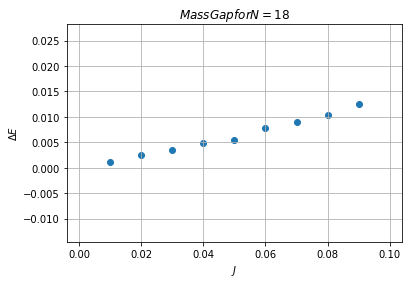

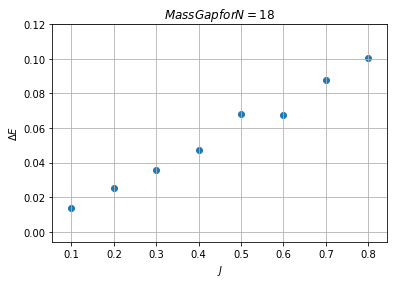

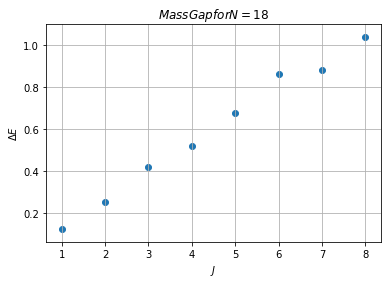

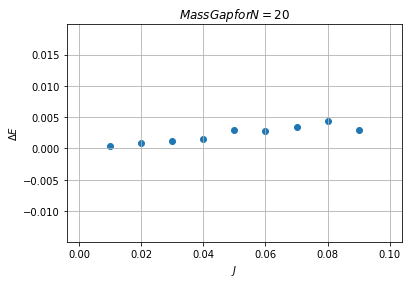

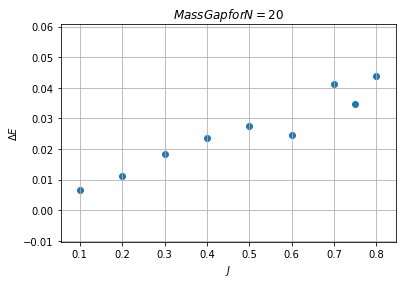

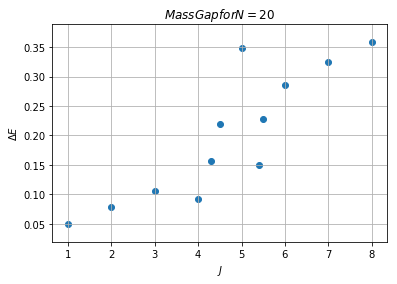

In [20]:
nnn = 18
gap_vs_J(nnn,[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09])
#gap_vs_J(nnn,[0.051,0.052,0.053,0.054,0.055,0.056,0.057,0.058])
gap_vs_J(nnn,[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
gap_vs_J(nnn,[1,2,3,4,5,6,7,8])
nnn = 20
gap_vs_J(nnn,[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09])
#gap_vs_J(nnn,[0.051,0.052,0.053,0.054,0.055,0.056,0.057,0.058])
gap_vs_J(nnn,[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.75,0.8])
gap_vs_J(nnn,[1,2,3,4,4.3,4.5,5,5.4,5.5,6,7,8])

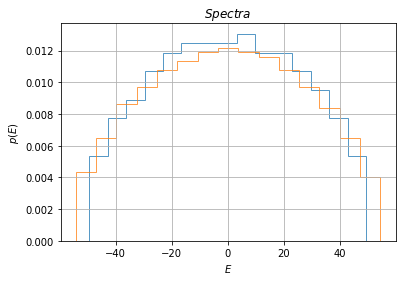

In [32]:
def answer(N):
    for nn in N:
        mean_eigs = load_eigs(nn,0)
       # print(mean_eigs)
        plt.hist(mean_eigs, 15, facecolor='green',density=1, alpha=0.75,histtype='step',label ='Energy')
     
    plt.xlabel(r'$E$')
    plt.ylabel(r'$p(E)$')
    plt.title(r'$Spectra$')
    plt.grid(True)
    plt.savefig("spectra"+str(N)+".png")
    plt.show()
    #return abs(mean_eigs[2]-mean_eigs[1])/abs(mean_eigs[0])
    
answer([18,20])


/usr/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log


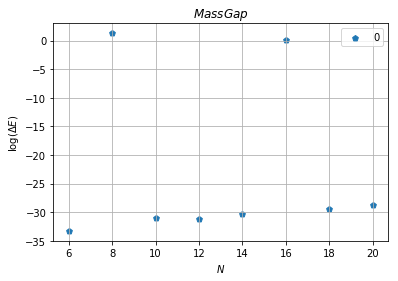

In [2]:
Nlist = [4,6,8,10,12,14,16,18,20,22]
show(Nlist,[0])

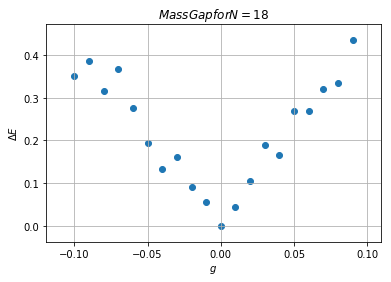

In [2]:
#gap_vs_g(18,[0,0.1,0.2,0.3,0.4,0.5,-0.1,-0.2,-0.3,-0.4,-0.5])
#gap_vs_g(16,[0,0.01,0.02,0.03,0.04,0.05,-0.01,-0.02,-0.03,-0.04,-0.05])
bb = [0.01*i for i in range(-10,10,1)]
gap_vs_g(18,bb)
#gap_vs_g(16,[0,0.1,0.2,0.3,0.4,0.5,-0.1,-0.2,-0.3,-0.4,-0.5])
#gap_vs_g(22,[0,0.1,0.2,0.3,0.4,0.5,-0.1,-0.2,-0.3,-0.4,-0.5])



In [8]:
[0.01*i for i in range(-100,100,1)]
#gap_vs_g(20,[0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,-0.01,-0.02,-0.03,-0.04,-0.05,-0.06,-0.07,-0.08,-0.09,-0.1])
#gap_vs_g(16,[0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,-0.01,-0.02,-0.03,-0.04,-0.05,-0.06,-0.07,-0.08,-0.09,-0.1])

#gap_vs_g(20,[0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,-0.01,-0.02,-0.03,-0.04,-0.05,-0.06,-0.07,-0.08,-0.09,-0.1])

[-1.0,
 -0.99,
 -0.98,
 -0.97,
 -0.96,
 -0.9500000000000001,
 -0.9400000000000001,
 -0.93,
 -0.92,
 -0.91,
 -0.9,
 -0.89,
 -0.88,
 -0.87,
 -0.86,
 -0.85,
 -0.84,
 -0.8300000000000001,
 -0.8200000000000001,
 -0.81,
 -0.8,
 -0.79,
 -0.78,
 -0.77,
 -0.76,
 -0.75,
 -0.74,
 -0.73,
 -0.72,
 -0.71,
 -0.7000000000000001,
 -0.6900000000000001,
 -0.68,
 -0.67,
 -0.66,
 -0.65,
 -0.64,
 -0.63,
 -0.62,
 -0.61,
 -0.6,
 -0.59,
 -0.58,
 -0.5700000000000001,
 -0.56,
 -0.55,
 -0.54,
 -0.53,
 -0.52,
 -0.51,
 -0.5,
 -0.49,
 -0.48,
 -0.47000000000000003,
 -0.46,
 -0.45,
 -0.44,
 -0.43,
 -0.42,
 -0.41000000000000003,
 -0.4,
 -0.39,
 -0.38,
 -0.37,
 -0.36,
 -0.35000000000000003,
 -0.34,
 -0.33,
 -0.32,
 -0.31,
 -0.3,
 -0.29,
 -0.28,
 -0.27,
 -0.26,
 -0.25,
 -0.24,
 -0.23,
 -0.22,
 -0.21,
 -0.2,
 -0.19,
 -0.18,
 -0.17,
 -0.16,
 -0.15,
 -0.14,
 -0.13,
 -0.12,
 -0.11,
 -0.1,
 -0.09,
 -0.08,
 -0.07,
 -0.06,
 -0.05,
 -0.04,
 -0.03,
 -0.02,
 -0.01,
 0.0,
 0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.06,
 0.07,
 0.08,
 0.0

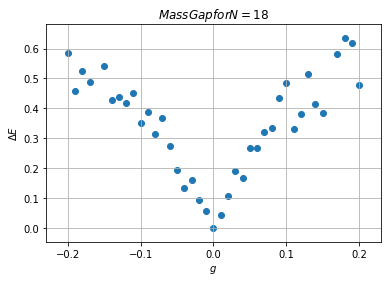

In [16]:
gap_vs_g(18,[
 -0.2,
 -0.19,
 -0.18,
 -0.17,
 -0.15,
 -0.14,
 -0.13,
 -0.12,
 -0.11,
 -0.1,
 -0.09,
 -0.08,
 -0.07,
 -0.06,
 -0.05,
 -0.04,
 -0.03,
 -0.02,
 -0.01,
 0.0,
 0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.06,
 0.07,
 0.08,
 0.09,
 0.1,
 0.11,
 0.12,
 0.13,
 0.14,
 0.15,
 0.17,
 0.18,
 0.19,
 0.2,
 ])